<a href="https://colab.research.google.com/github/PankajBGadge/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### <b>Problem Statement</b>
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.

# 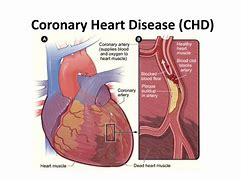

## **Variables**
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
## **Data Description**
**Demographic:**


• **Sex:** male or female("M" or "F")

• **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


 **Behavioral**

• **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)


**Medical( history)**
• **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)

• **Diabetes:** whether or not the patient had diabetes (Nominal)
Medical(current)

• **Tot Chol:** total cholesterol level (Continuous)

• **Sys BP:** systolic blood pressure (Continuous)

• **Dia BP:** diastolic blood pressure (Continuous)

• **BMI:** Body Mass Index (Continuous)

• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values).

• **Glucose:** glucose level (Continuous)

# **Predict variable (desired target)**

• **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Now lets import required libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project 3/data_cardiovascular_risk.csv')

# **Data Inspection**

In [4]:
# First look
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
dataset.shape

(3390, 17)

There are 17 columns and 3390 rows in our dataset





# **Convert NaN values**

In [7]:
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
dataset['education'].fillna(dataset.education.mean(), inplace=True)
dataset['cigsPerDay'].fillna(dataset.cigsPerDay.mean(), inplace=True)
dataset['BPMeds'].fillna(dataset.BPMeds.mean(), inplace=True)
dataset['totChol'].fillna(dataset.totChol.mean(), inplace=True)
dataset['BMI'].fillna(dataset.BMI.mean(), inplace=True)
dataset['heartRate'].fillna(dataset.heartRate.mean(), inplace=True)
dataset['glucose'].fillna(dataset.glucose.mean(), inplace=True)

In [9]:
dataset.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**NaN values we replace by mean values**

In [10]:
dataset.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.005915,NaN,NaN,11.840458,0.169190,0.080309,0.464719,0.158153,44.993041,22.29203,12.023581,4.106939,11.970102,23.131808,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,128.50000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [11]:
# duplicate
len(dataset[dataset.duplicated()])

0

**There are no duplicate in our datasets**

In [12]:
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **Data encoding**

Before we start predicting, an important step to do is to convert our sex and is_smoking feature, which is a string, into integer. M will be converted to 1 and F will be converted to 0. Same for YES will be converted to 1 and NO will be converted to 0.We will name this new columns a "Sex" and "Smoking".

In [13]:
dataset['Sex'] = dataset['sex'].apply(lambda x : 1 if x == "M" else 0)



In [14]:
dataset['Smoking'] = dataset['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [15]:
dataset = dataset.drop(['id','sex','is_smoking'],axis=1)

In [16]:
dataset.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Sex,Smoking
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,0,1


# **Exploring Dependent Variable**

In [17]:
dataset['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

# **Exploratory Data Analysis**

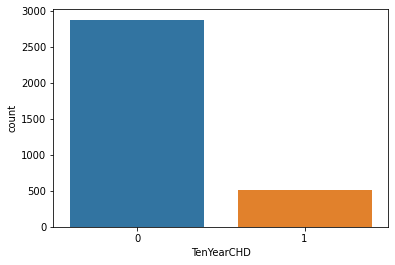

In [18]:
sns.countplot(x=dataset['TenYearCHD'])

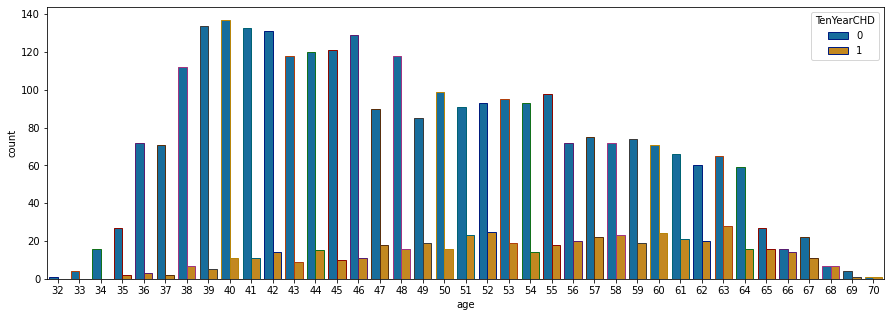

In [19]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x='age',hue='TenYearCHD',data=dataset,palette='colorblind',edgecolor=sns.color_palette('dark'))

Percentage of Senior people lose their life : 29.22077922077922


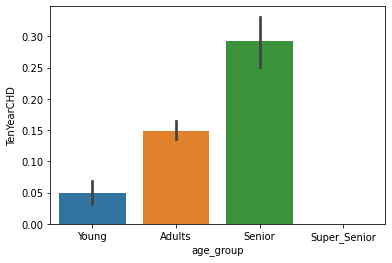

In [20]:
bins = [20,40,60, 80, np.nan]
labels = ['Young','Adults', 'Senior', 'Super_Senior']

dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels)

print('Percentage of Senior people lose their life :', dataset['TenYearCHD'][dataset['age_group']=='Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='TenYearCHD', data=dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


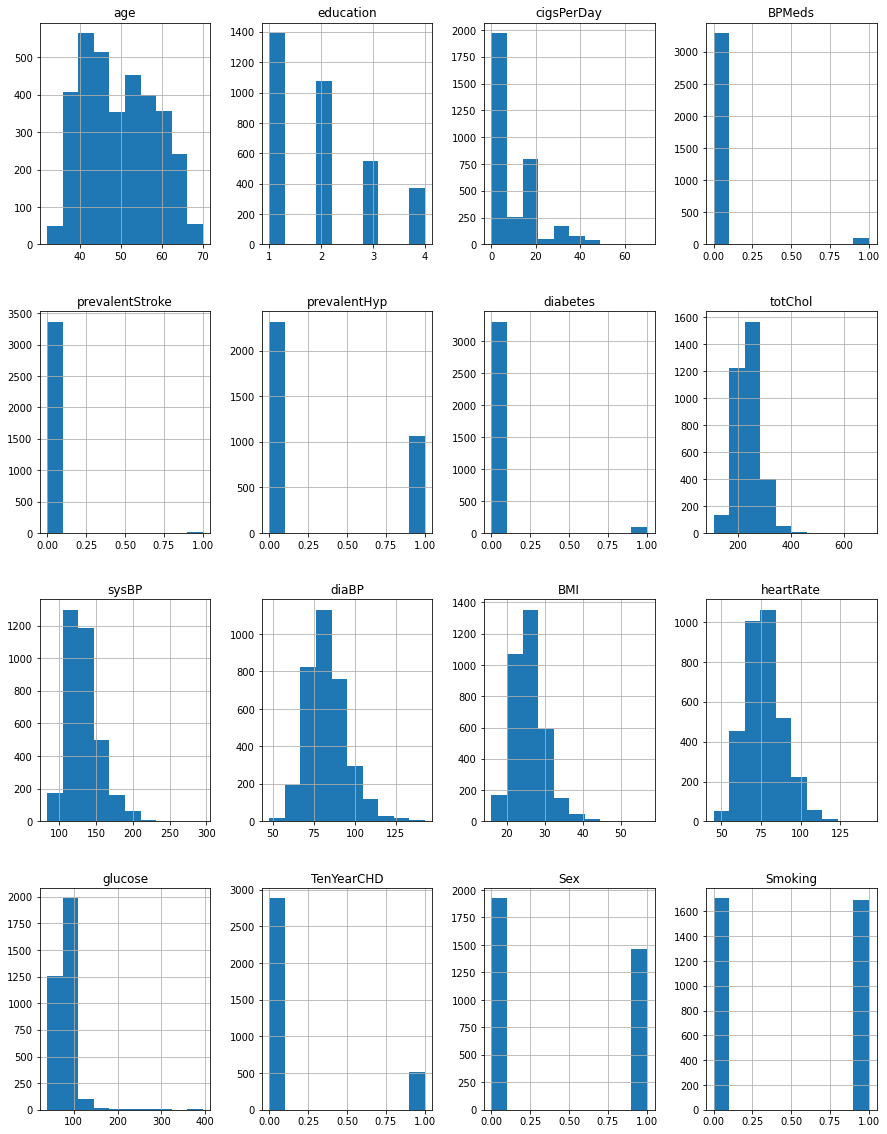

In [21]:
# understanding distribution of data before imputation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


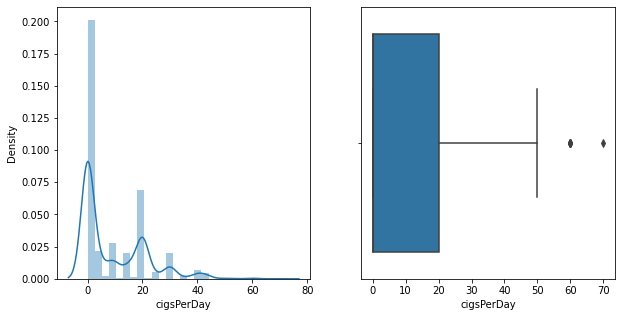

In [22]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['cigsPerDay'], ax=axes[0])
sns.boxplot(dataset['cigsPerDay'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


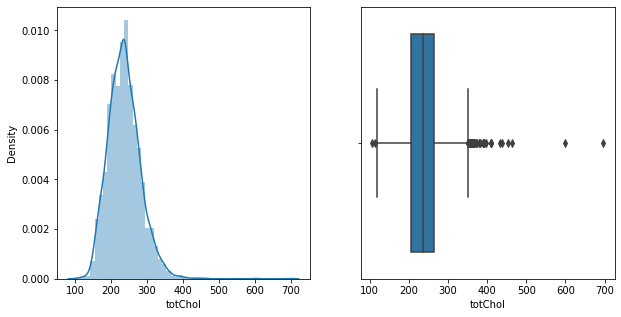

In [23]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['totChol'], ax=axes[0])
sns.boxplot(dataset['totChol'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


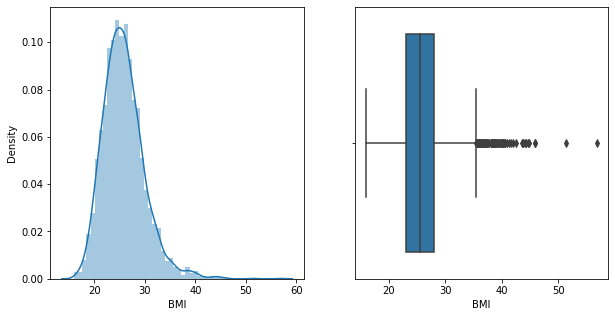

In [24]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['BMI'], ax=axes[0])
sns.boxplot(dataset['BMI'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


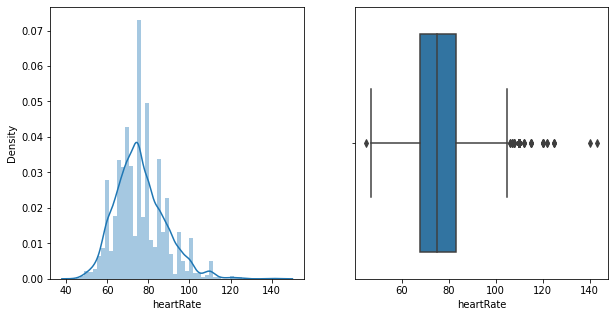

In [25]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['heartRate'], ax=axes[0])
sns.boxplot(dataset['heartRate'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


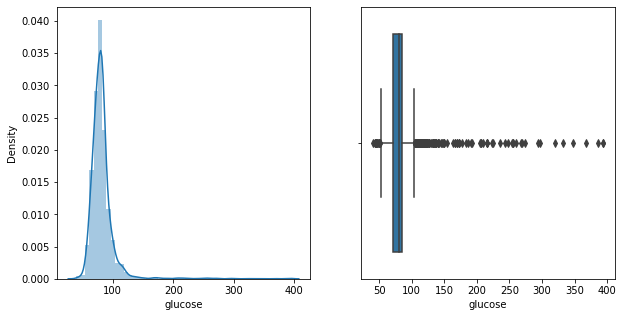

In [26]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['glucose'], ax=axes[0])
sns.boxplot(dataset['glucose'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


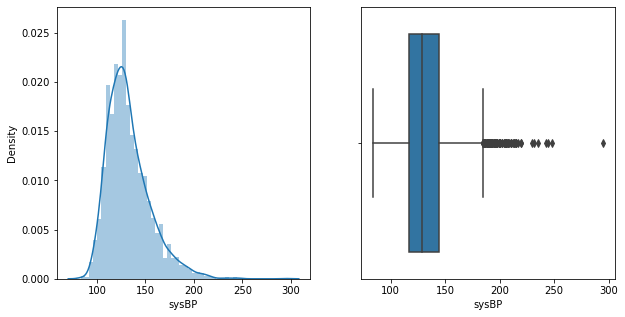

In [27]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['sysBP'], ax=axes[0])
sns.boxplot(dataset['sysBP'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


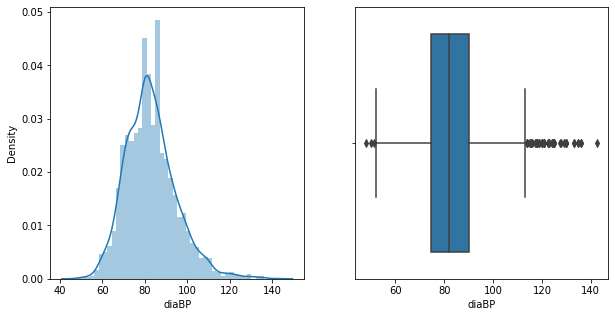

In [28]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['diaBP'], ax=axes[0])
sns.boxplot(dataset['diaBP'], ax=axes[1])

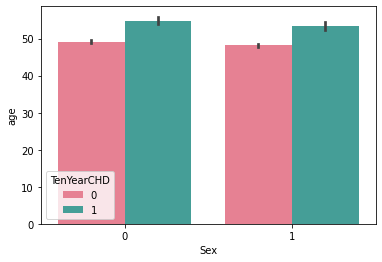

In [29]:
sns.barplot(data=dataset,x='Sex',y='age',hue='TenYearCHD',palette='husl')

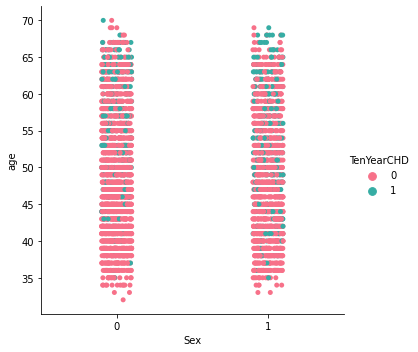

In [30]:
sns.catplot(data=dataset,x='Sex',y='age',hue='TenYearCHD',palette='husl')

In [31]:
dataset.groupby(['TenYearCHD'])['age','sysBP','diaBP','heartRate','BMI','glucose','diabetes','Smoking','prevalentHyp'].count().sort_values(by='TenYearCHD',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,age,sysBP,diaBP,heartRate,BMI,glucose,diabetes,Smoking,prevalentHyp
TenYearCHD,,,,,,,,,
1,511,511,511,511,511,511,511,511,511
0,2879,2879,2879,2879,2879,2879,2879,2879,2879


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


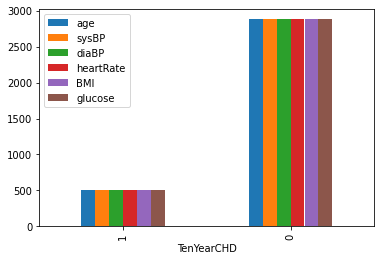

In [32]:
dataset.groupby(['TenYearCHD'])['age','sysBP','diaBP','heartRate','BMI','glucose'].count().sort_values(by='TenYearCHD',ascending=False).head(10).plot(kind='bar')

In [33]:
dataset = dataset.drop(['age_group'],axis=1)

# **Lets split the data into train and test data**

In [34]:
X, y = dataset.drop('TenYearCHD',axis=1), dataset['TenYearCHD']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [36]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Now Lets implement 5 models on our dataset:**

Logistic Regression

Random Forrest

XGBoost

K-NN

Neural Networks


# **We will be using three search algorithms for each :**

GridSearchCV

RandomSearchCV

BayesianSearchCV

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
pip install scikit_optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.0 MB/s 


In [39]:
import numpy as np
from skopt import gp_minimize

In [40]:

import skopt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble


In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [42]:
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)
knn = KNeighborsClassifier(n_neighbors=7)

# **Logistic Regression**

In [43]:
param_dict_lr = {
    'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]
}

param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

param_dict_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }


    
  

In [44]:
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict_lr,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 0.001, 10000.0, 100000.0, 1000000.0]},
             scoring='roc_auc', verbose=2)

In [45]:
print('Train ROC-AUC score : ', lr_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8529287821323219
Test ROC-AUC score :  0.8623402163225172


In [46]:
lr_random = RandomizedSearchCV(estimator=lr,
                       param_distributions = param_dict_lr,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.2s
[CV] END ..............................................C=100; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END .......................................

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                              0.1, 1, 10, 100, 0.001, 10000.0,
                                              100000.0, 1000000.0]},
                   scoring='roc_auc', verbose=2)

In [47]:
print('Train ROC-AUC score : ', lr_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8529287821323219
Test ROC-AUC score :  0.8623402163225172


In [48]:
lr_bayes = BayesSearchCV(estimator=lr,
                       search_spaces = {'C' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='roc_auc', n_iter=32)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=47.48857021740191; total time=   0.1s
[CV] END ................................C=47.48857021740191; total time=   0.0s
[CV] END ................................C=47.48857021740191; total time=   0.0s
[CV] END ................................C=47.48857021740191; total time=   0.1s
[CV] END ................................C=47.48857021740191; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=0.039552076807891974; total time=   0.0s
[CV] END .............................C=0.039552076807891974; total time=   0.0s
[CV] END .............................C=0.039552076807891974; total time=   0.0s
[CV] END .............................C=0.039552076807891974; total time=   0.0s
[CV] END .............................C=0.039552076807891974; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_iter=32,
              scoring='roc_auc',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [49]:
lr_bayes.best_estimator_

LogisticRegression(C=2.025979440059329)

In [50]:
print('Train ROC-AUC score : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8550358196375896
Test ROC-AUC score :  0.8672566371681416


**Out of three search algorithms we conclude that all the three search algorithm doing well.But when we compare GridSearchCV slightly better as compared to RandomSearchCV and BayesianSearchCV**

In [51]:
lr_model =lr_grid.best_estimator_

# **Random Forest Classifier**

In [52]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [53]:
rf_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 50}

In [54]:
print('Train ROC-AUC score : ', rf_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8478718921196797
Test ROC-AUC score :  0.8525073746312685


In [55]:
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='roc_auc', verbose=2)

In [56]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 150,
 'min_samples_leaf': 50,
 'max_depth': 4}

In [57]:
print('Train ROC-AUC score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8478718921196797
Test ROC-AUC score :  0.8525073746312685


In [58]:
rf_bayes = BayesSearchCV(estimator=rf,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='roc_auc')

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, min_samples_leaf=89, min_samples_split=66, n_estimators=33; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=89, min_samples_split=66, n_estimators=33; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=89, min_samples_split=66, n_estimators=33; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=89, min_samples_split=66, n_estimators=33; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=89, min_samples_split=66, n_estimators=33; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=90, min_samples_split=61, n_estimators=47; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=90, min_samples_split=61, n_estimators=47; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=90, min_samples_split=61, n_estimators=47; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=90, min_samples_split=61, n_estimat

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), scoring='roc_auc',
              search_spaces={'max_depth': Integer(low=4, high=8, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='normalize')},
              verbose=2)

In [59]:
rf_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 141),
             ('n_estimators', 38)])

In [60]:
print('Train ROC-AUC score : ', rf_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8478718921196797
Test ROC-AUC score :  0.8525073746312685


**Out of three search algorithms we conclude that all the three search algorithm doing well.**

In [61]:
rf_model =rf_grid.best_estimator_

# **XG Boost Classifier**

In [62]:
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.2s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_

GridSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=2)

In [63]:
xgb_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}

In [64]:
print('Train ROC-AUC score : ', xgb_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8550358196375896
Test ROC-AUC score :  0.855457227138643


In [65]:
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .learning_rate=0.005, max_depth=6, n_estimators=180; total time=   0.6s
[CV] END .learning_rate=0.005, max_depth=6, n_estimators=180; total time=   0.6s
[CV] END .learning_rate=0.005, max_depth=6, n_estimators=180; total time=   0.6s
[CV] END .learning_rate=0.005, max_depth=6, n_estimators=180; total time=   0.6s
[CV] END .learning_rate=0.005, max_depth=6, n_estimators=180; total time=   0.6s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=140; total time=   0.6s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=140; total time=   0.6s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=140; total time=   0.6s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=140; total time=   0.5s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=140; total time=   0.7s
[CV] END ..learning_rate=0.005, max_depth=6, n_estimators=60; total time=   0.2s
[CV] END ..learning_rate=0.005, max_depth=6, n_e

RandomizedSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42),
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_depth': range(2, 10),
                                        'n_estimators': range(60, 220, 40)},
                   scoring='roc_auc', verbose=2)

In [66]:
xgb_random.best_params_

{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.01}

In [67]:
print('Train ROC-AUC score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8499789296249474
Test ROC-AUC score :  0.856440511307768


In [68]:
xgb_bayes = BayesSearchCV(estimator=xgb,
                       search_spaces = {
                          'max_depth': Integer(2, 10),
                          'n_estimators': Integer(60, 220),
                          'learning_rate': Real(0.001, 0.1, prior='log-uniform')
                        },
                       cv = 5, verbose=2, scoring='roc_auc', n_jobs=10)

xgb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
              scoring='roc_auc',
              search_spaces={'learning_rate': Real(low=0.001, high=0.1, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=60, high=220, prior='uniform', transform='normalize')},
              verbose=2)

In [69]:
xgb_bayes.best_params_

OrderedDict([('learning_rate', 0.03737677496128866),
             ('max_depth', 2),
             ('n_estimators', 172)])

In [70]:
print('Train ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8579856721449641
Test ROC-AUC score :  0.8544739429695182


In case of XG Boost classifier also we found that Out of all three search algorithms  all the three search algorithm doing well.But when we compare GridSearchCV slightly better as compared to RandomSearchCV and BayesianSearchCV

In [71]:
xgb_model =xgb_grid.best_estimator_

# **KNN Classifier**

In [72]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [73]:
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

grid = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')

grid.fit(X_train,y_train)

grid.best_params_
#{'knn__n_neighbors': 5}

{'knn__n_neighbors': 64}

In [74]:
print('Train ROC-AUC score : ', grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8478718921196797
Test ROC-AUC score :  0.8525073746312685


In [75]:
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

knn_random = RandomizedSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')

knn_random.fit(X_train,y_train)

knn_random.best_params_
#{'knn__n_neighbors': 5}

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'knn__n_neighbors': 64}

In [76]:
print('Train ROC-AUC score : ', knn_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', knn_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8478718921196797
Test ROC-AUC score :  0.8525073746312685


In [77]:
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

knn_Bayes = BayesSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')

knn_Bayes.fit(X_train,y_train)

knn_Bayes.best_params_
#{'knn__n_neighbors': 5}

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

OrderedDict([('knn__n_neighbors', 64)])

In [78]:
print('Train ROC-AUC score : ', knn_Bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', knn_Bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8478718921196797
Test ROC-AUC score :  0.8525073746312685


In case of KNN classifier also we found that Out of all three search algorithms all the three search algorithm doing well

In [79]:
knn_model =grid.best_estimator_

# **Lets collect all our best models !**

In [90]:
  X = X.reshape(-1, 1)

AttributeError: ignored

In [93]:
models = [lr_model, rf_model, xgb_model]

In [96]:
def model_metric(models,X_train, X_test, y_train, y_test):
  
  cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC']
  model_df = pd.DataFrame(columns=cols)
  conf_train, conf_test = {}, {}
  
  i = 0
  for model in models:
    
    model.fit(X_train, y_train)
  
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train)
    model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test)
    model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train)
    model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test)
    model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train)
    model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test)
    model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train)
    model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test)
    #model_df.loc[i,'Train ROC-AUC'] = roc_auc__score(y_train, y_pred_train)
    #model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test)

    conf_train[model.__class__.__name__] = confusion_matrix(y_train, y_pred_train)
    conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test)

    i+=1

  return model_df, conf_train, conf_test

In [97]:
model_metric(models,X_train,y_train,X_test,y_test)

ValueError: ignored

In [83]:
model_df


NameError: ignored